# Table of Contents
* [Learning Objectives:](#Learning-Objectives:)
* [Other 2D plot styles](#Other-2D-plot-styles)
* [Using Pandas .plot()](#Using-Pandas-.plot%28%29)
	* [Line plots](#Line-plots)
		* [Timeseries](#Timeseries)
	* [Scatter](#Scatter)
	* [Box Plots](#Box-Plots)
	* [Histograms](#Histograms)
	* [Bar Charts](#Bar-Charts)


# Learning Objectives:

After completion of this module, learners should be able to:

* generate basic two-dimensional plots with  `matplotlib` (e.g., line plots, scatter plots, bar plots, etc.)
* generate statistical plots from Pandas DataFrames with `.plot()`
  * Bar charts, box plots, line plots, scatter plots and historgrams

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_datareader import data

# Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. Some of the more useful ones are shown below. 

TIP: See the [matplotlib plot gallery](http://matplotlib.org/gallery.html) for a complete list of available plot types. 

In [2]:
n = np.array([0,1,2,3,4,5])
x = np.linspace(0, 5, 20)
xx = np.linspace(-0.75, 1., 100)

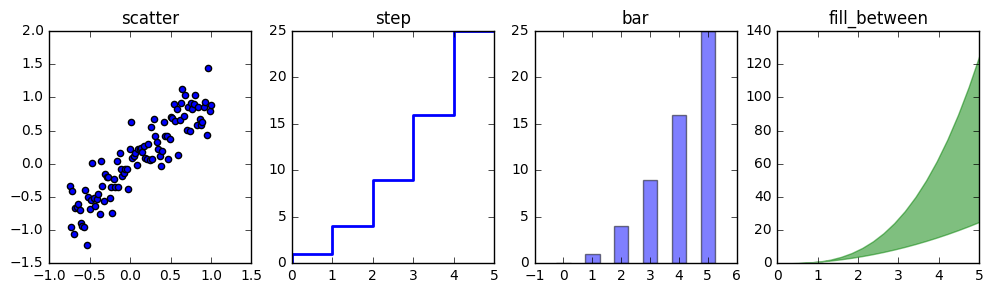

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

In [ ]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

In [ ]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

# Using Pandas .plot()

Pandas has a direct interface to Matplotlib through the `.plot()` method. This method will automatically set many style properties of the plot like legends and axes labels. In many cases the `.plot()` method can perform statistical analyses before displaying the plot.

There are sevearl plot types available using the `kind=` keyword argument.

See the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) for a complete list.

## Line plots

The default is to plot all columns at once. It can crowd the plot.

In [ ]:
degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv', index_col='Year')
degrees.plot()

We can make a subset of the columns.

In [ ]:
stem=['Computer Science', 'Math and Statistics', 'Engineering', 'Physical Sciences', 'Biology']
degrees[stem].plot(figsize=(15,7))

### Timeseries

Timeseries formatting is handled gracefully with Pandas. Here I'm also using the `subplots=True` argument.

In [ ]:
aapl = data.DataReader('AAPL','yahoo', '2007-1-1', '2007-12-31')
aapl[['Close','Volume']].plot(figsize=(15,8), subplots=True)

## Scatter

In [ ]:
auto = pd.read_csv('data/auto-mpg.csv')

In [ ]:
auto.plot(kind='scatter', x='hp', y='mpg')

In [ ]:
auto.plot(kind='scatter', x='hp', y='mpg', color='green')

## Box Plots

Box Plots provide a quick statistical overview of a single column.

In [ ]:
auto['mpg'].plot(kind='box')

We can also use the `.boxplot()` method to perform the statistical analysis after a groupby operation.

In [ ]:
auto.boxplot(column='mpg', by='origin')

Here I'm using a timeseries and grouping by month. This requires that a separate column for the month be provided.

In [ ]:
pit= pd.read_csv('data/pittsburgh2013.csv', parse_dates=['Date'], index_col='Date')
pit['month']=pit.index.month
pit.boxplot(column='Mean TemperatureF', by='month' )

## Histograms

In [ ]:
pit[['Max TemperatureF']].plot(kind='hist', figsize=(15,8))

## Bar Charts

In [ ]:
medals = pd.read_csv('data/medals.csv')
medals.head()

I'm going to add up all medals won by each contry and plot as a bar chart.

In [ ]:
medals.groupby('name').sum().plot(kind='bar', figsize=(15,7))